## Decision Tree Applications
### Learn from Disaster
##### Objectives
+ Learn how to use the sklearn decision tree classification API
+ Create basic plots and analysis using decision Trees
+ familiarization with supervised learning data science work flow.
+ Install Decision Tree Plotting capability with Graphviz

#### Delivarables
+ HTML or PDF extraction uploaded to OAKS from a jupyter notebook with the following:
    + data loading
    + data preproccessing 
    + data splitting using a 70/30 split with a random hold out
    + Three Decision Tree Models:
    
        * One Over fitted (good performance on training, poor performance on test)
        * One Under fitted model (poor performance on both training and test)
        * One optimum model good performance on training and test sets )
        * plot of the final model
        * Written summary of findings and recomendations from the model detailing which types of passengers are likely to survice a disaster, and lessons learning on model building
        
      + Performance will be dertimed by sklearn.metrics.accuracy_score


#### DataSet
use url to curl data set with pandas
 

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


url = 'https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv'
data = pd.read_csv(url)
data.head()

/home/matthew/.local/lib/python3.6/site-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [3]:

numeric_inputs =[ 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare']
categorical_inputs = ['Sex', 'Pclass']

ohe =  OneHotEncoder().fit(data[categorical_inputs ])

imp = SimpleImputer(strategy='mean').fit(data[numeric_inputs])

ohe.get_feature_names()

pipe = ColumnTransformer([('catEnc', ohe, categorical_inputs), ('imp', imp, numeric_inputs)]).fit(data)
pipe.transform(data)

array([[ 0.    ,  1.    ,  0.    , ...,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    ,  1.    , ...,  1.    ,  0.    , 71.2833],
       [ 1.    ,  0.    ,  0.    , ...,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 1.    ,  0.    ,  0.    , ...,  1.    ,  2.    , 23.45  ],
       [ 0.    ,  1.    ,  1.    , ...,  0.    ,  0.    , 30.    ],
       [ 0.    ,  1.    ,  0.    , ...,  0.    ,  0.    ,  7.75  ]])

In [4]:
data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [24]:
X = pipe.transform(data)
y = data['Survived'].values

feature_names = list(ohe.get_feature_names()) + numeric_inputs
feature_names

['x0_female',
 'x0_male',
 'x1_1',
 'x1_2',
 'x1_3',
 'Age',
 'Siblings/Spouses Aboard',
 'Parents/Children Aboard',
 'Fare']

In [6]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

test acc 0.6109215017064846, 
train acc 0.6161616161616161


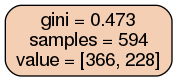

In [25]:
model =  DecisionTreeClassifier(max_depth=2, min_samples_leaf=500).fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_names, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


test acc 0.7713310580204779, 
train acc 0.9629629629629629


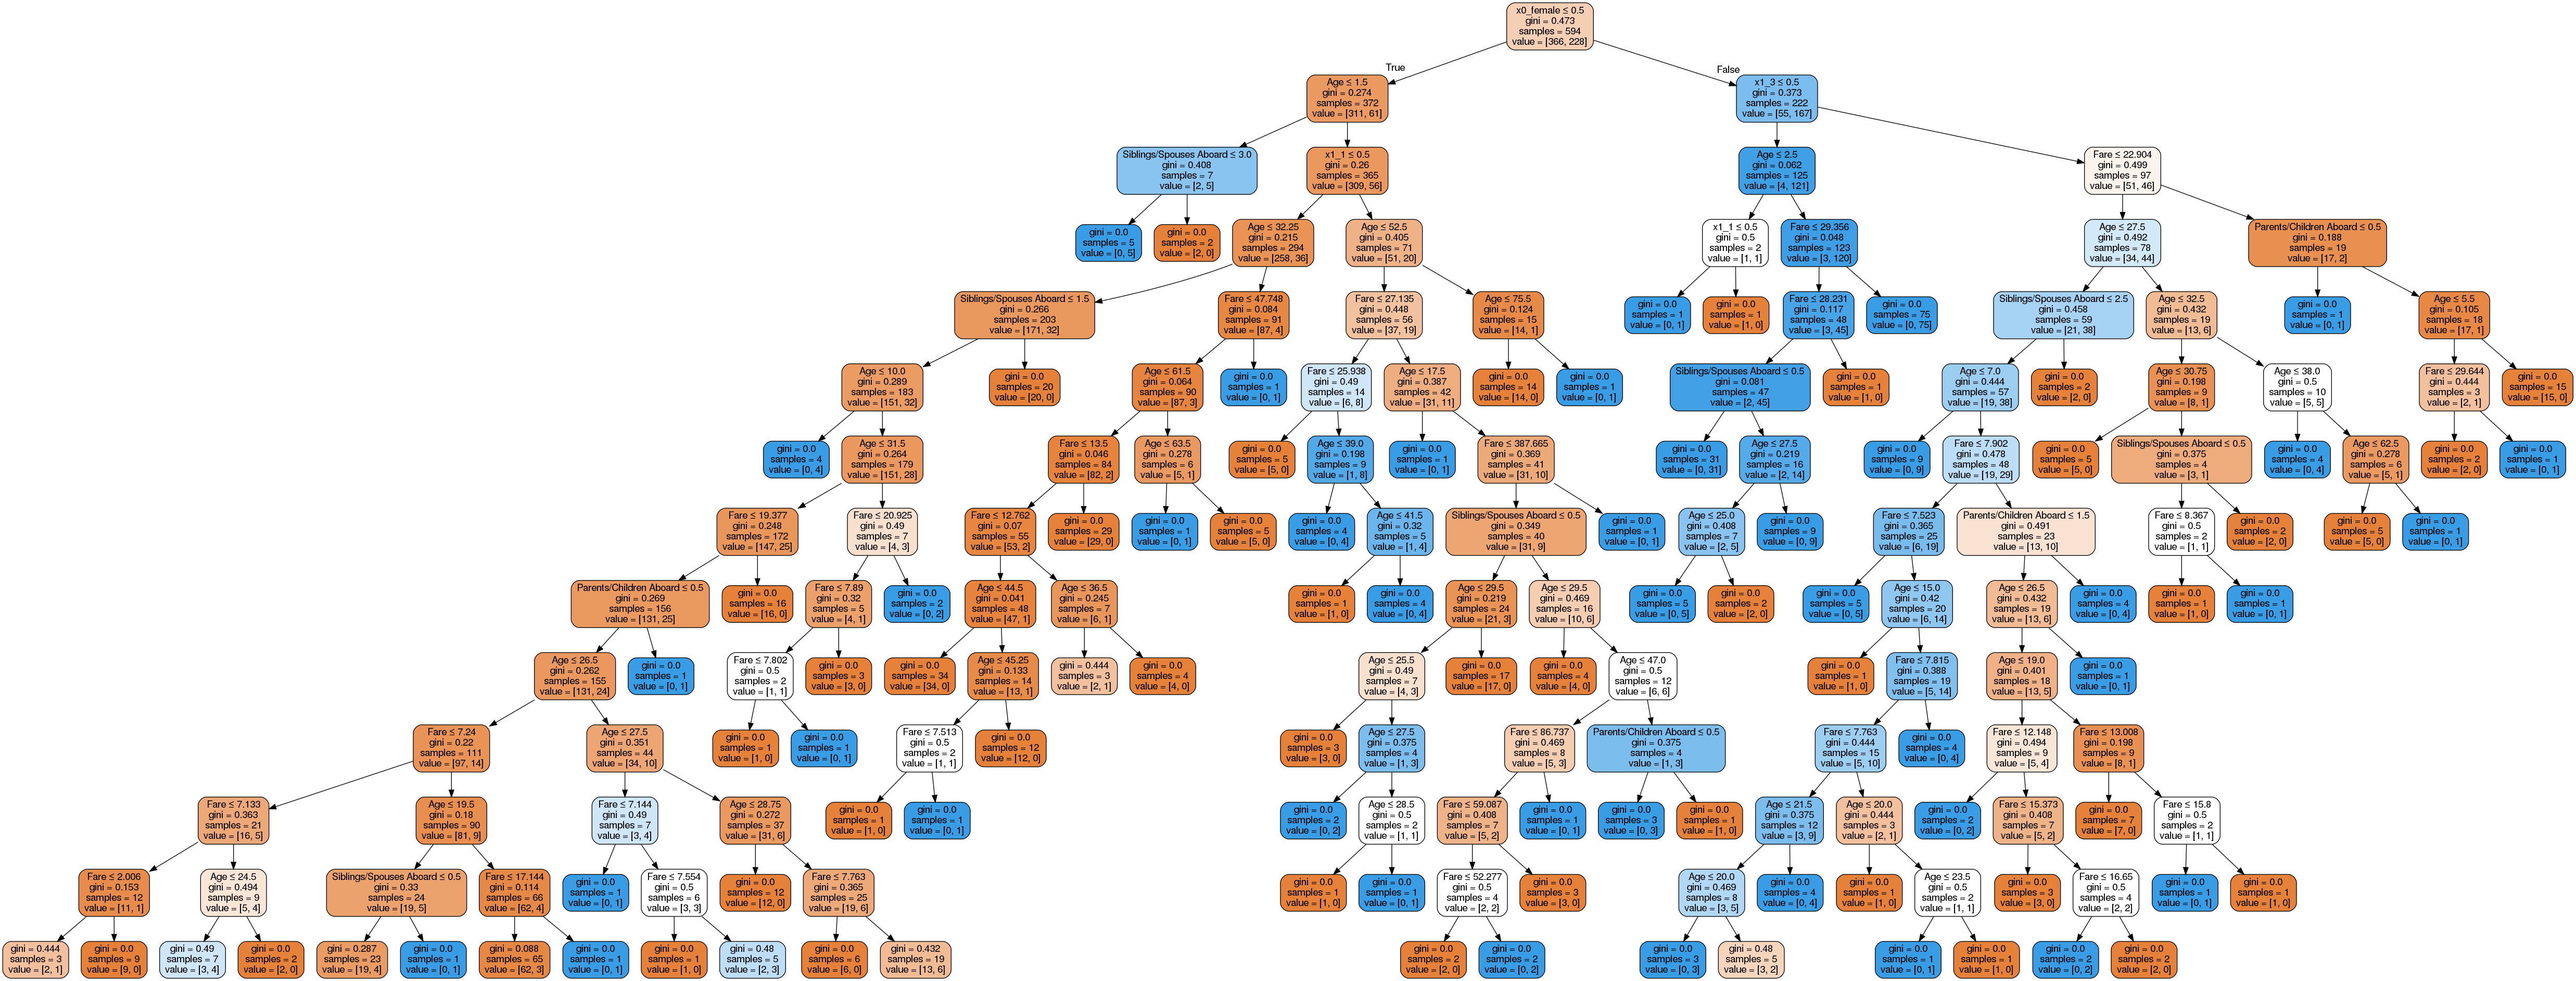

In [20]:

model =  DecisionTreeClassifier(max_depth=13, min_samples_leaf=1).fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))

dot_data = StringIO()

export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_names, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())



test acc 0.8020477815699659, 
train acc 0.8602693602693603


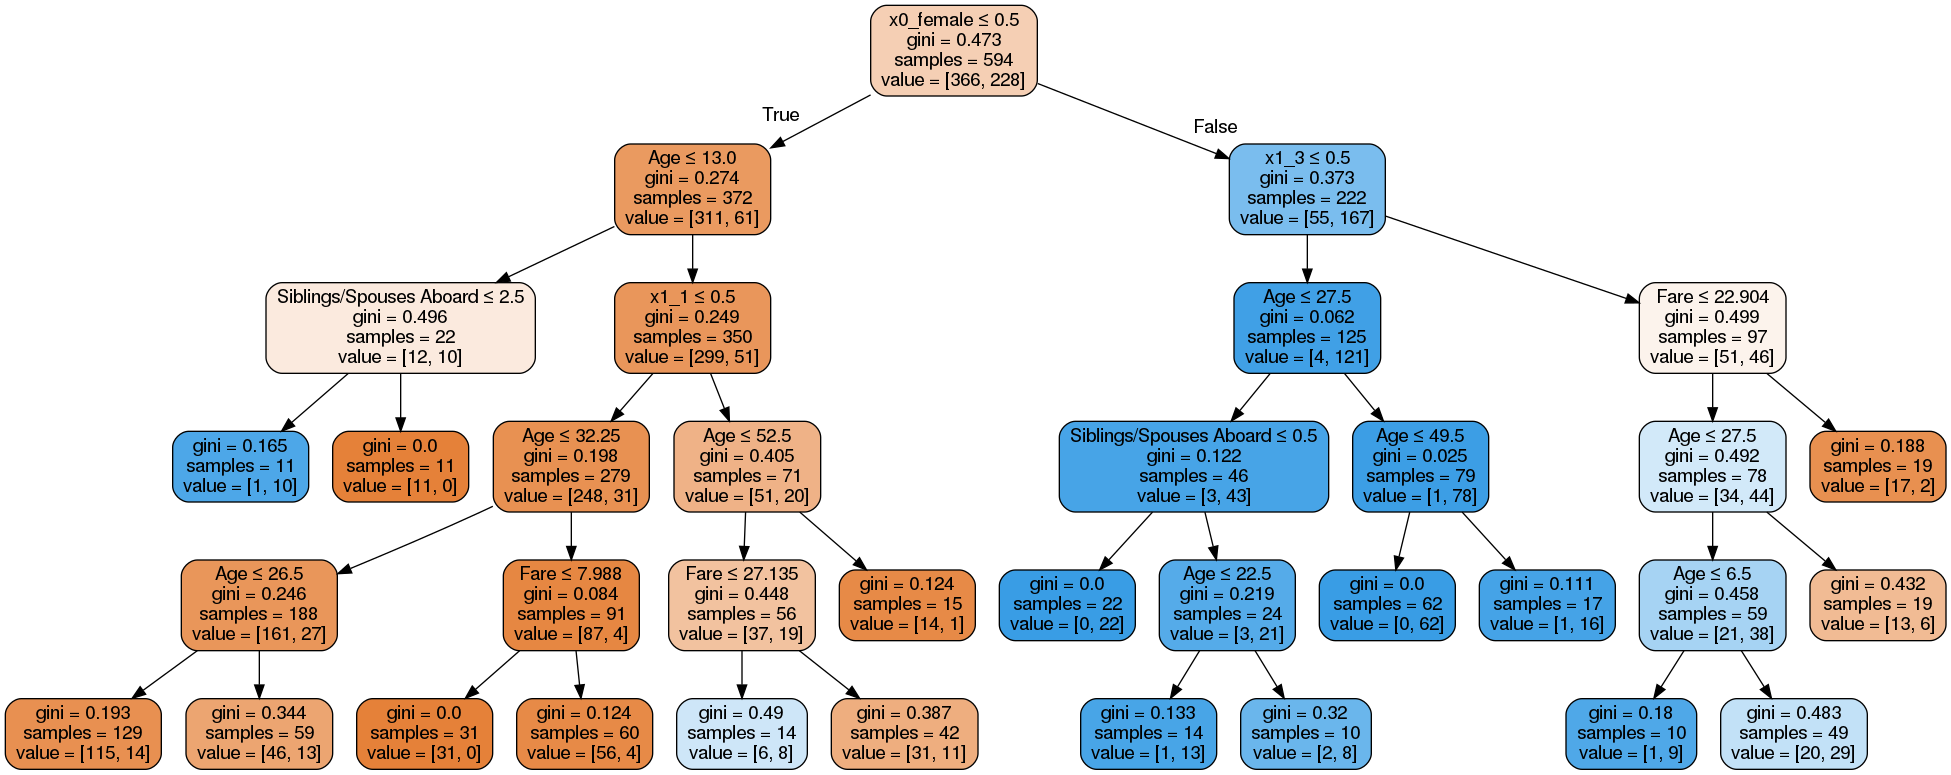

In [23]:

model =  DecisionTreeClassifier(max_depth=5, min_samples_leaf=10).fit(X_train, y_train)
preds_test = model.predict(X_test)
preds_train = model.predict(X_train)

acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)


acc_test = accuracy_score(y_test, preds_test)
acc_train = accuracy_score(y_train, preds_train)

print('test acc {0}, \ntrain acc {1}'.format(acc_test, acc_train))

dot_data = StringIO()



export_graphviz(model, out_file=dot_data,  
                filled=True, rounded=True,
                feature_names = feature_names, 
                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())
